<a href="https://colab.research.google.com/github/Abi-DS/BCSE331L-EDA-Project/blob/main/22BDS0122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BCSE331L - EDA - Course Project [Phase 2]
##Abinanthan S
## 22BDS0122

#***Section 1: Introduction to Deeper Analysis***
-------------------------------------------------

## **Module 4: Deeper Exploratory Data Analysis**


### Setup and loading:
This initial step involves loading the dataset and defining our variables. Based on the data dictionary and initial inspection, columns are classified as either continuous (representing measurements) or categorical (representing distinct groups or binary states), which is crucial for choosing the correct analysis techniques.

In [9]:
# ===================================================================
# Phase 2: Comprehensive Analysis for Gunnels.csv
# ===================================================================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. SETUP AND COLUMN SELECTION ---
df = pd.read_csv('Gunnels.csv')
df = df.drop('rownames', axis=1)

# Programmatically define column types
continuous_cols = ['Time', 'Fromlow', 'Slope', 'Rw']
# These are numeric but represent categories
categorical_cols = ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']

print("Analysis will be performed on the following columns:")
print(f"Continuous Variables: {continuous_cols}")
print(f"Categorical Variables: {categorical_cols}")
print("-" * 60)


Analysis will be performed on the following columns:
Continuous Variables: ['Time', 'Fromlow', 'Slope', 'Rw']
Categorical Variables: ['Gunnel', 'Amphiso', 'Subst', 'Pool', 'Water', 'Cobble']
------------------------------------------------------------


#**(1.) Advanced 1D Analysis: Exploring Individual Variables**
In this section, we move beyond basic plots to statistically analyze each variable on its own. We will calculate skewness to understand the symmetry of the data's distribution and examine quantiles to see where data points lie. The distribution plots (histograms and density plots) provide a visual confirmation of these statistics, helping us identify if the data is normally distributed or skewed. For categorical variables, count plots show the frequency of each category, revealing any class imbalances.



Performing 1D Analysis...
Skewness of Continuous Variables:
Time      -0.393544
Fromlow   -0.065813
Slope      2.955768
Rw        -0.143814
dtype: float64

Quantiles of Continuous Variables:
       Time  Fromlow  Slope   Rw
0.25  623.0    71.75    0.0  0.0
0.50  712.5   158.00    0.0  0.6
0.75  810.0   224.25   10.0  1.0
------------------------------------------------------------
Generating distributions for each continuous variable...


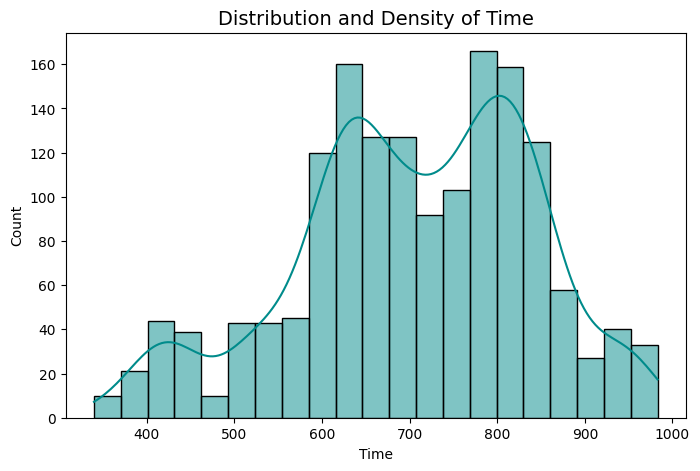

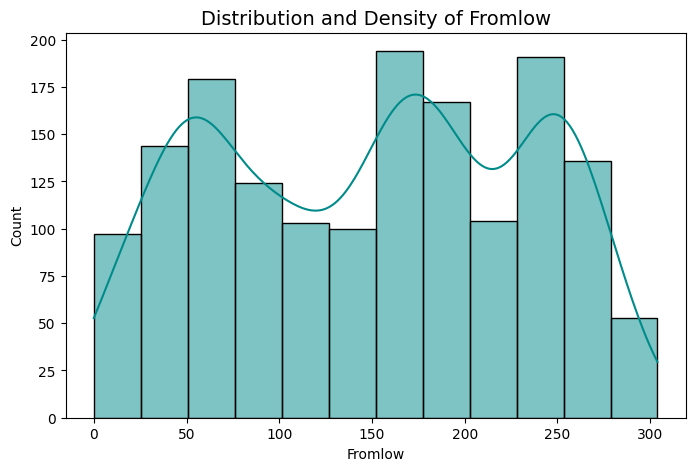

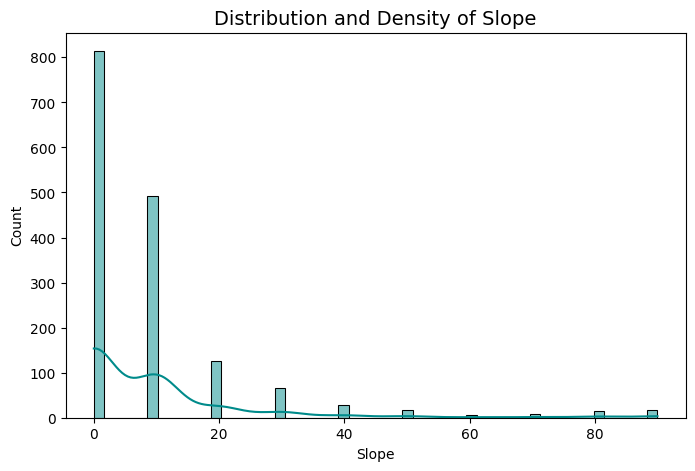

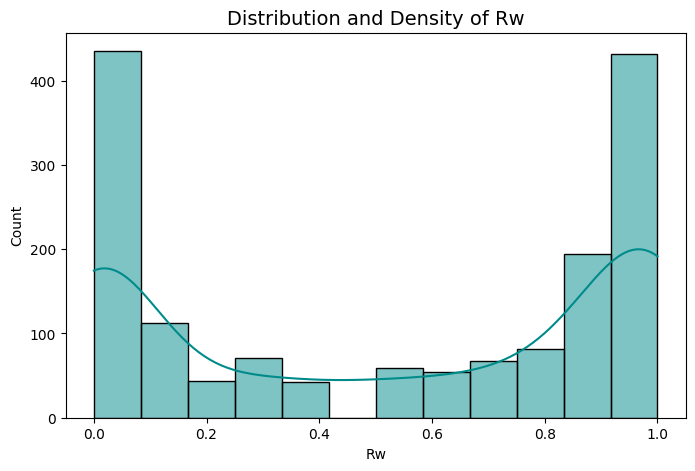

Generating counts for each categorical variable...


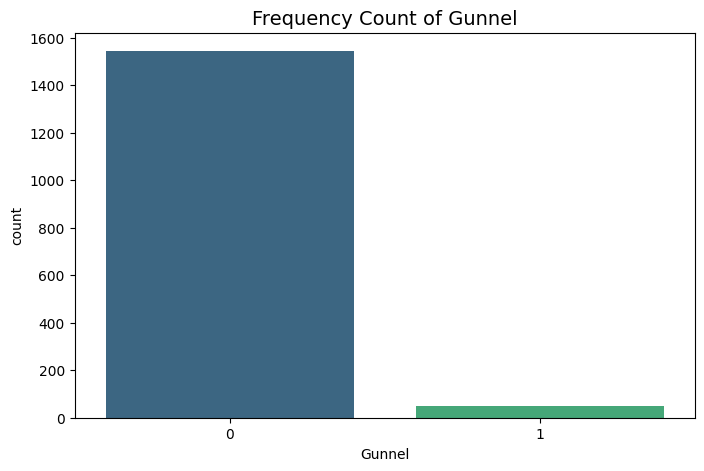

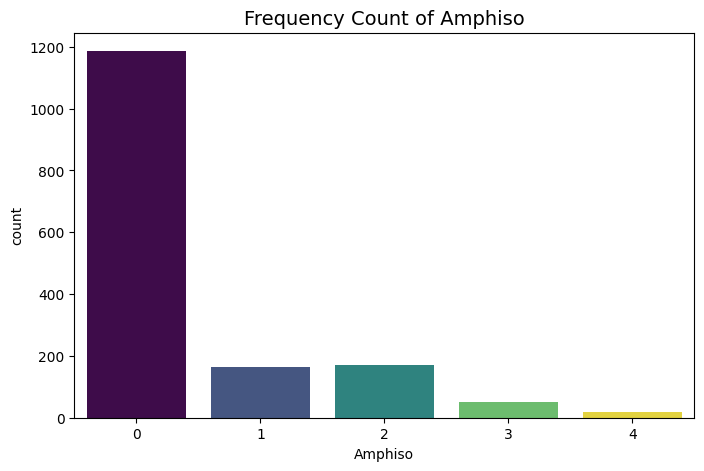

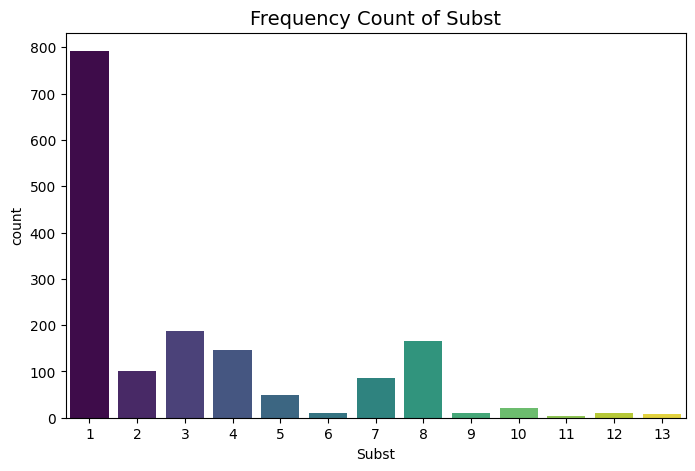

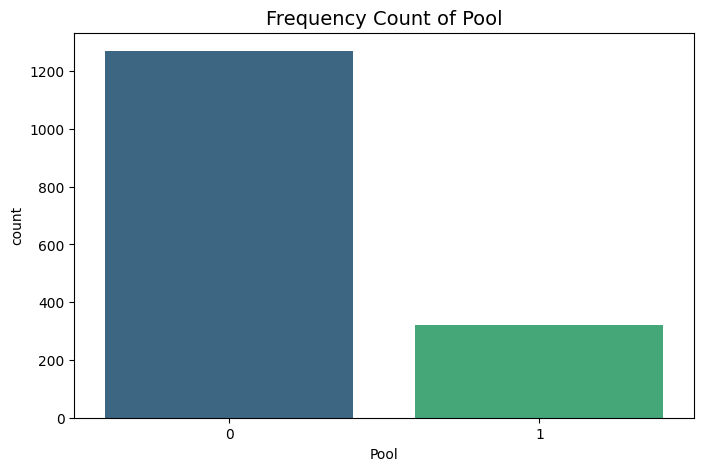

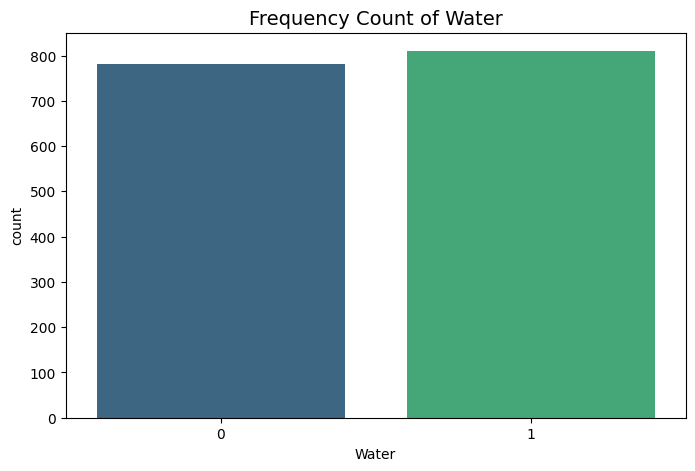

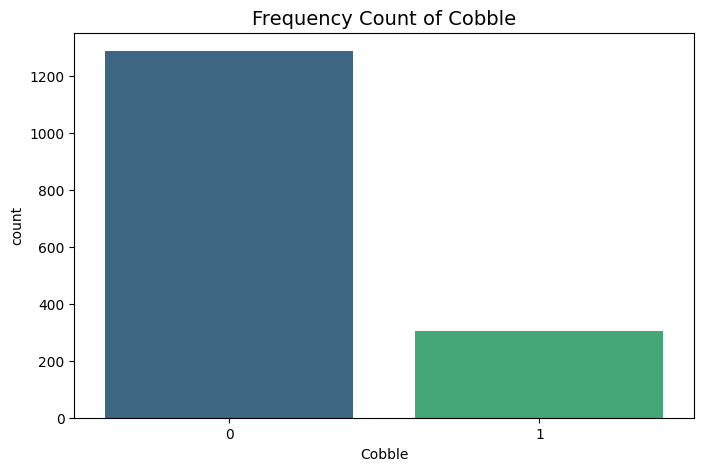

In [10]:
print("\nPerforming 1D Analysis...")

# Skewness and Quantiles for continuous variables
print("Skewness of Continuous Variables:")
print(df[continuous_cols].skew())
print("\nQuantiles of Continuous Variables:")
print(df[continuous_cols].quantile([0.25, 0.5, 0.75]))
print("-" * 60)


# Automated plotting loop for continuous variables
print("Generating distributions for each continuous variable...")
for col in continuous_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='darkcyan')
    plt.title(f'Distribution and Density of {col}', size=14)
    plt.show()

# Automated plotting loop for categorical variables
print("Generating counts for each categorical variable...")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Frequency Count of {col}', size=14)
    plt.show()



#***Section 2: 2D and 3D Analysis***
-------------------------------------

#**(2.)Advanced 2D Analysis: Investigating Relationships Between Pairs of Variables**
Here, we explore the relationships between pairs of variables to uncover potential patterns and correlations.

Numerical vs. Numerical: The pairplot gives us a quick overview of correlations. We look for linear trends (positive or negative) in the scatter plots.

Numerical vs. Categorical: Boxplots are used to see if the distribution of a numerical variable changes across different categories. This can reveal significant differences between groups.

Categorical vs. Categorical: Heatmaps of crosstabulations show the frequency of co-occurrence between categories of two different variables. This helps identify strong associations.


Performing 2D Analysis...
Generating Pairplot for all continuous variables...


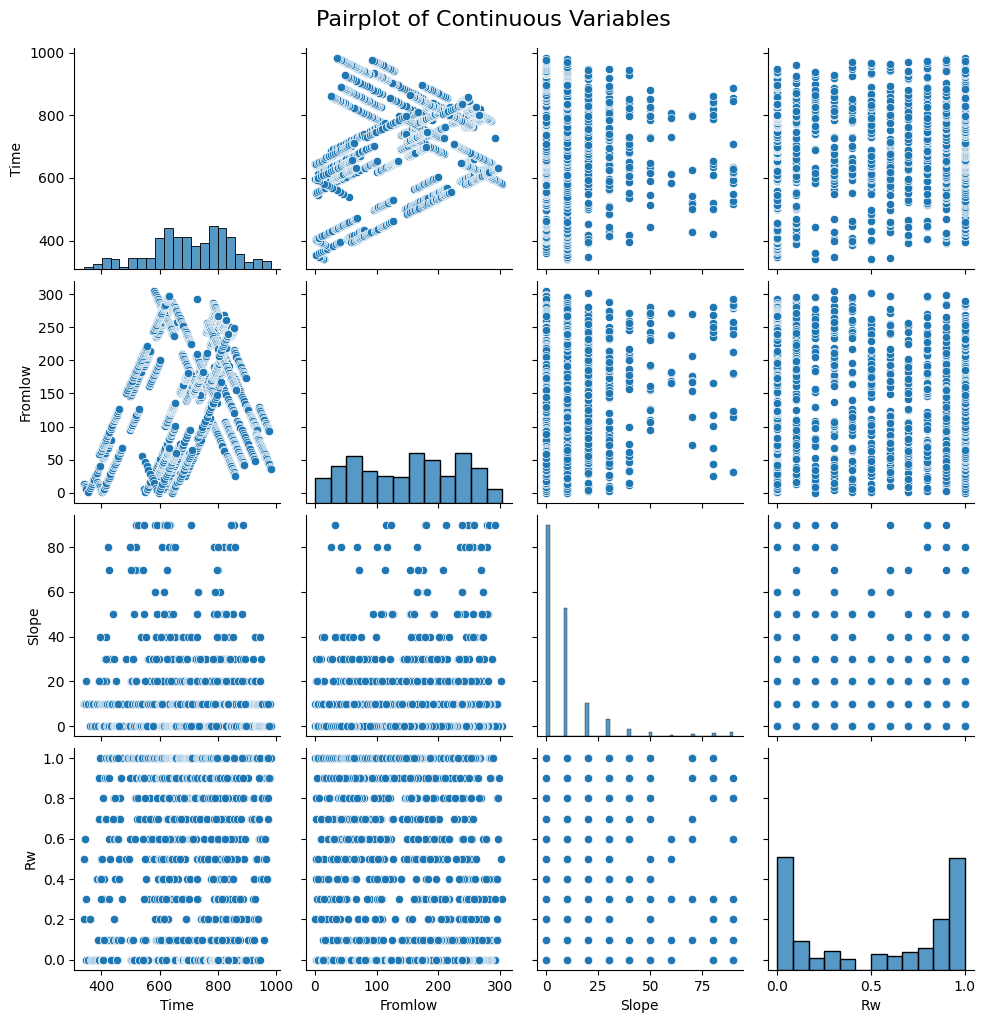

Generating Boxplots for Numerical vs. Categorical variables...


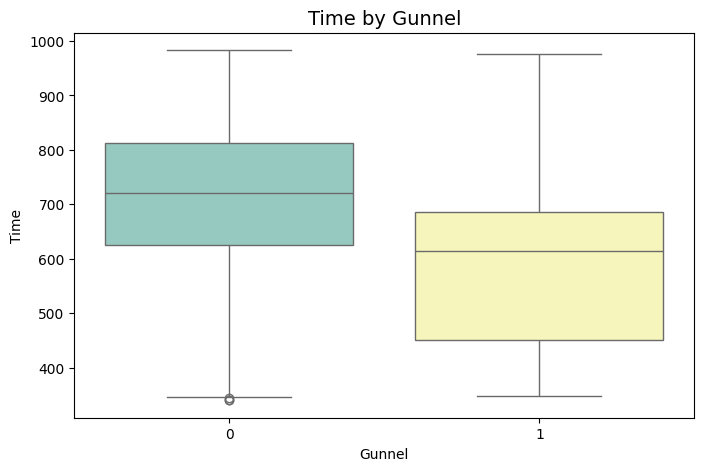

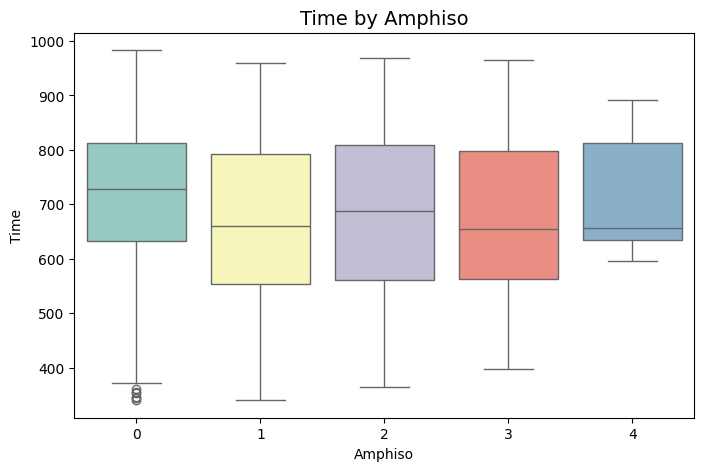

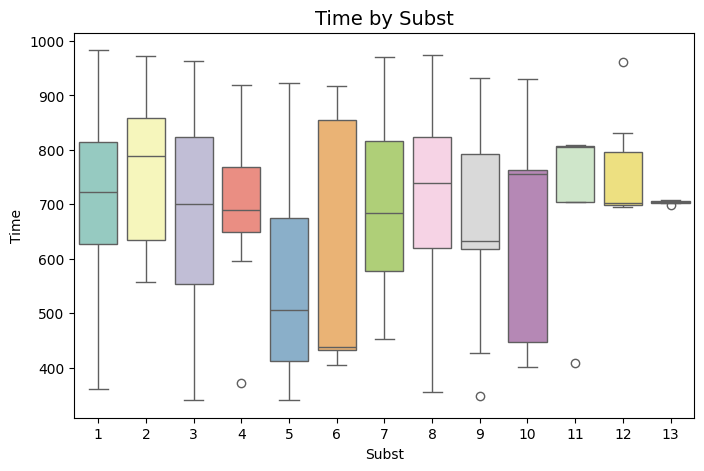

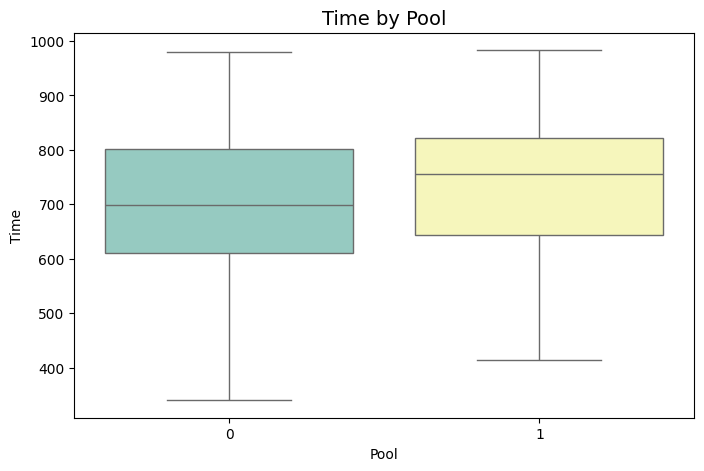

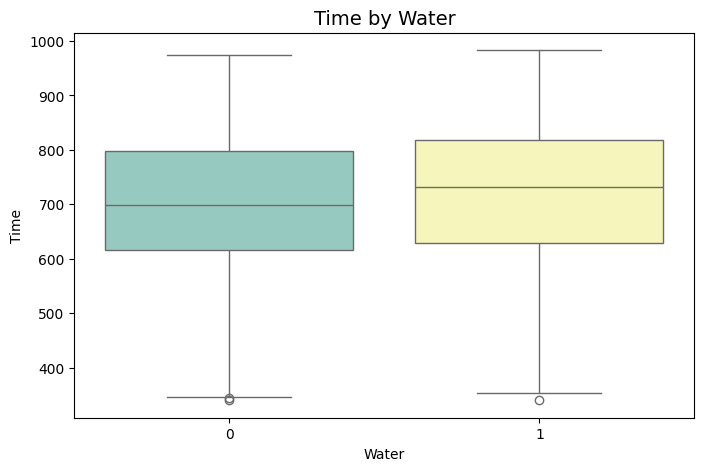

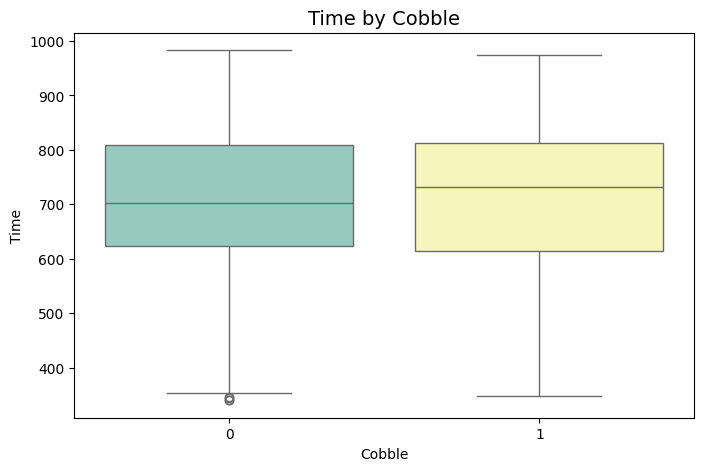

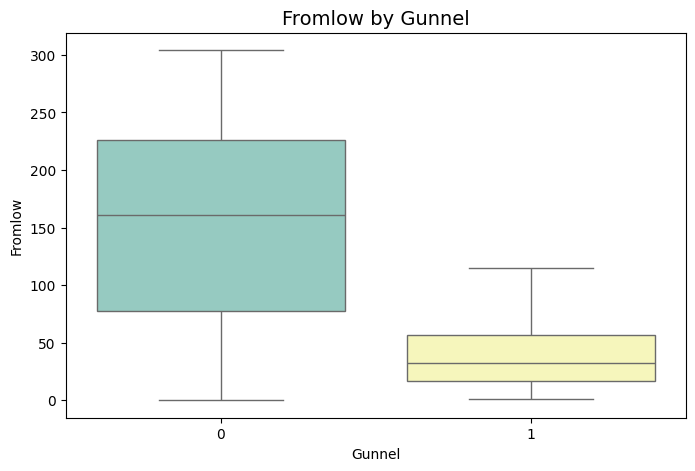

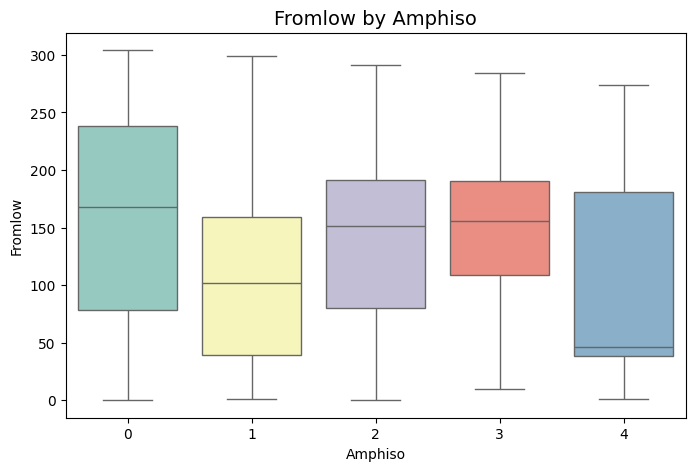

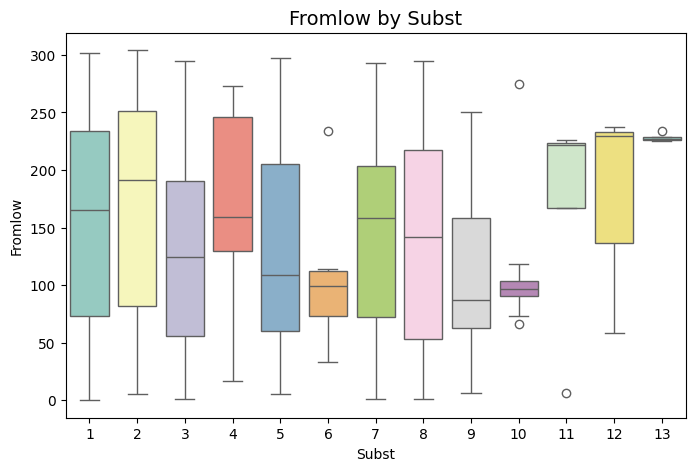

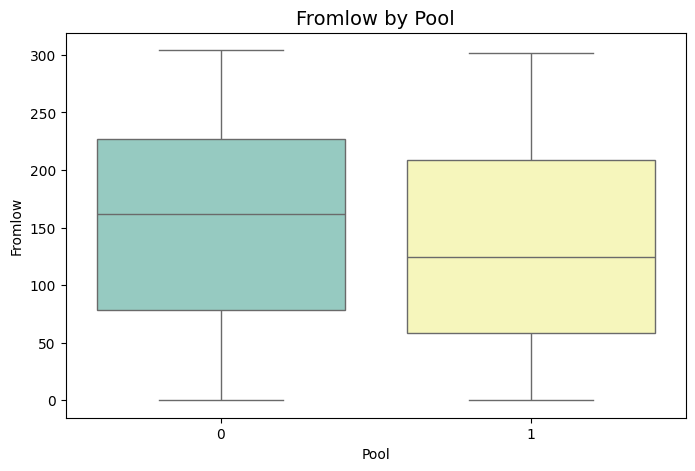

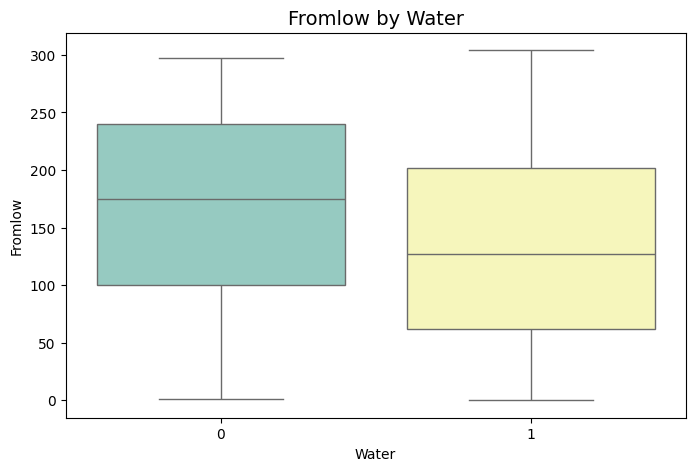

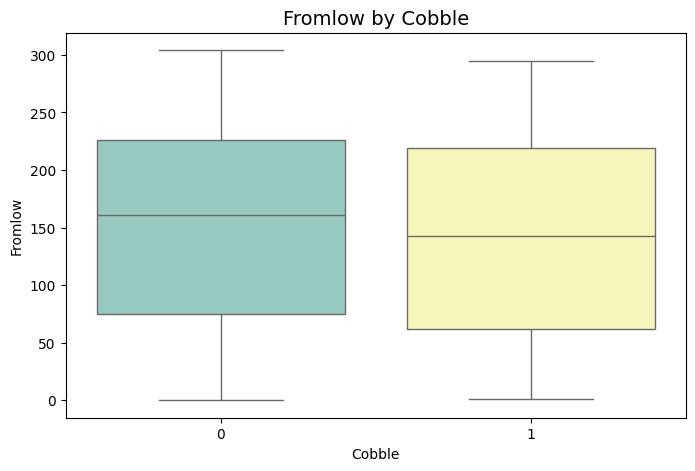

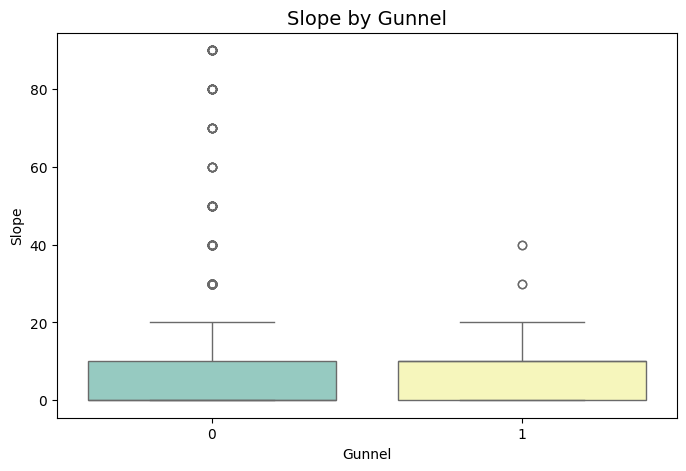

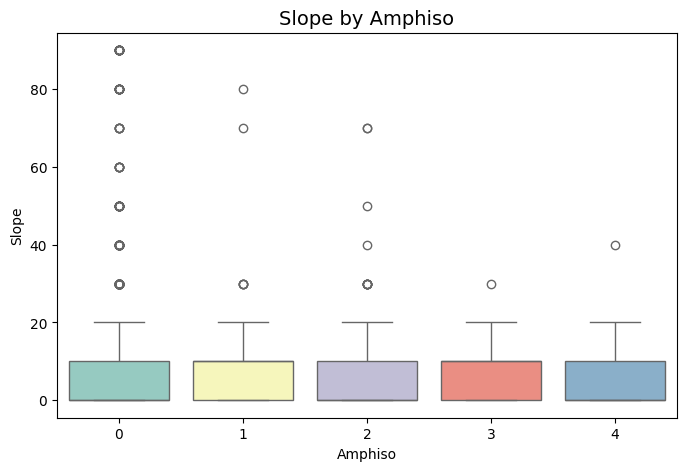

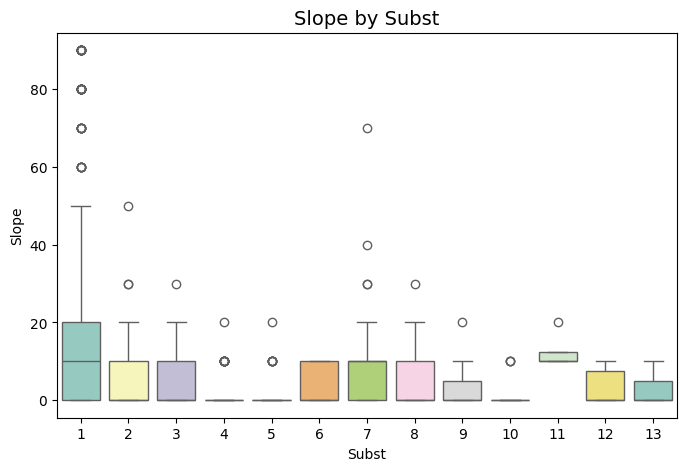

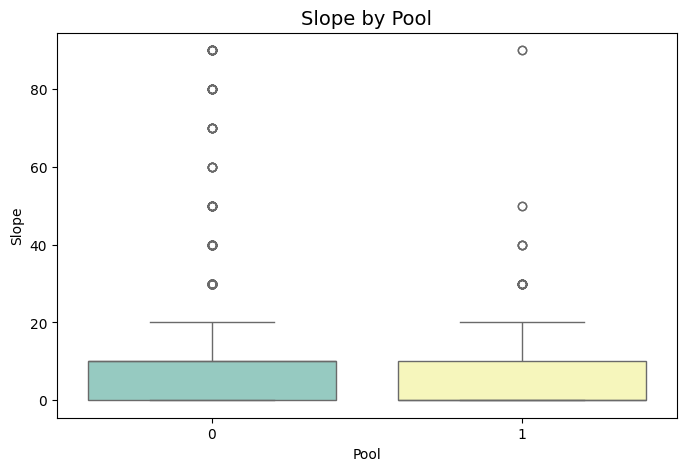

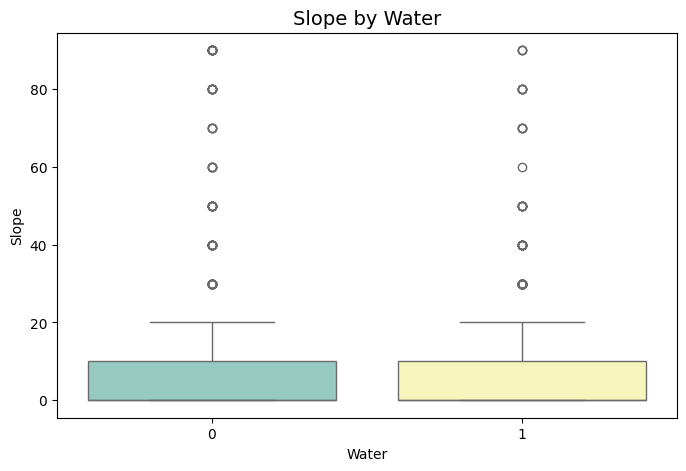

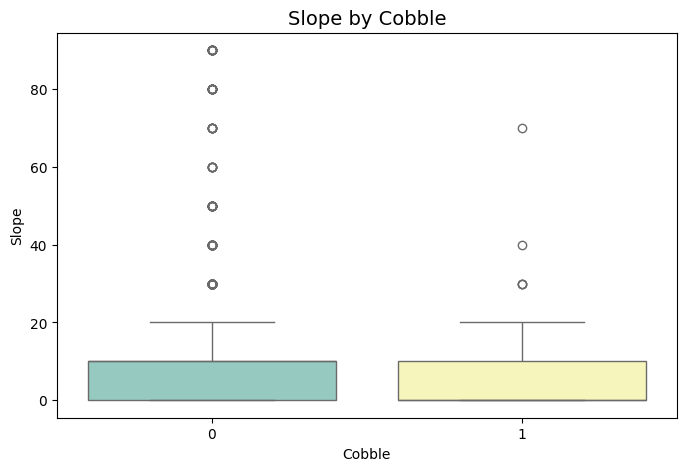

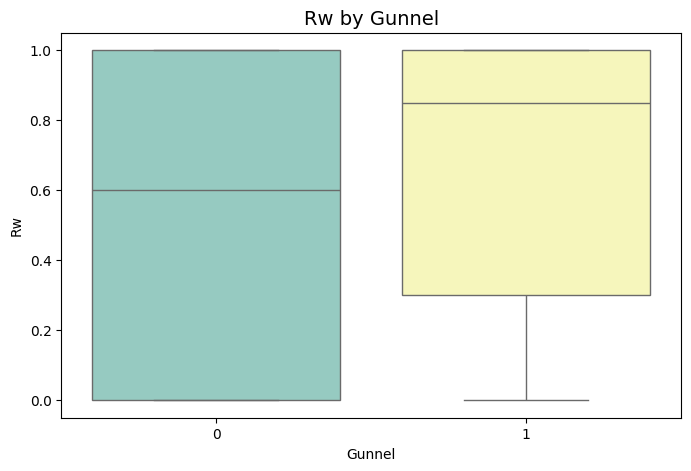

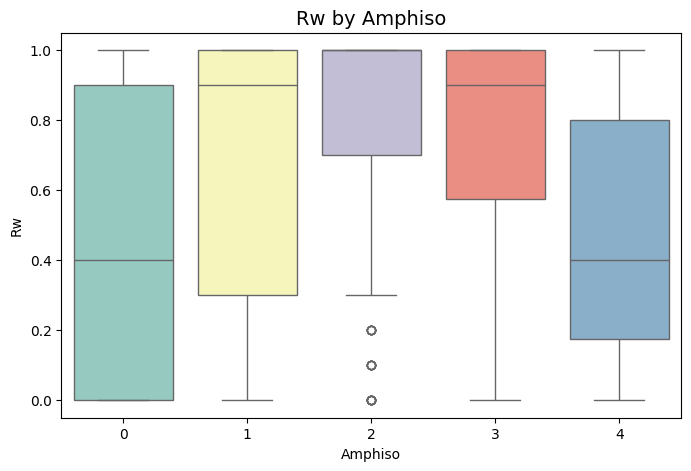

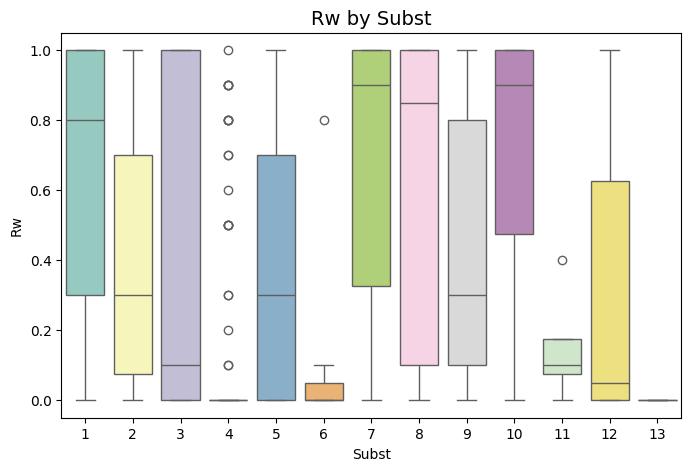

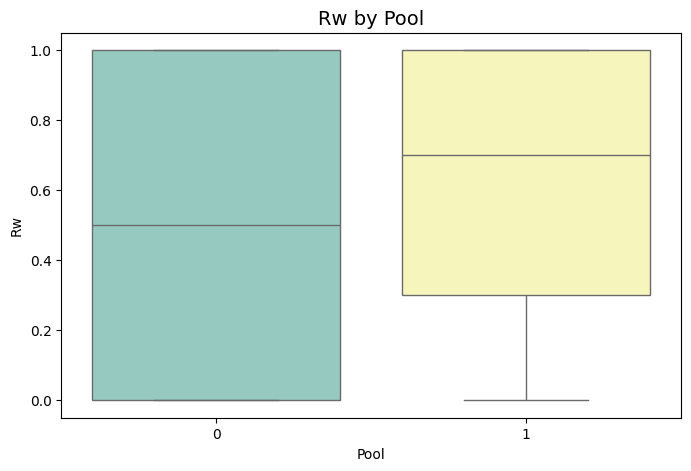

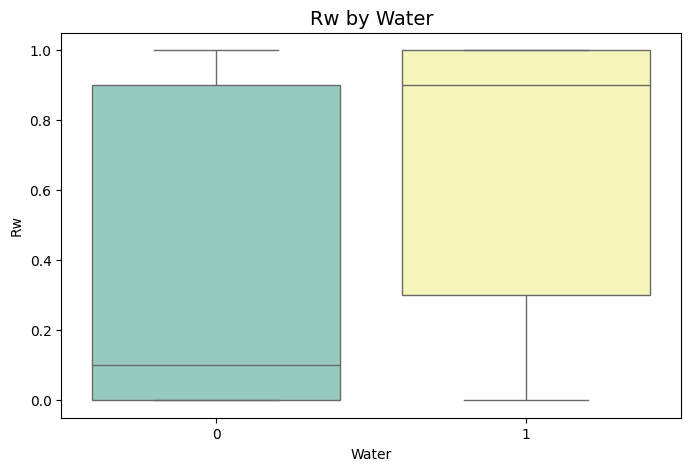

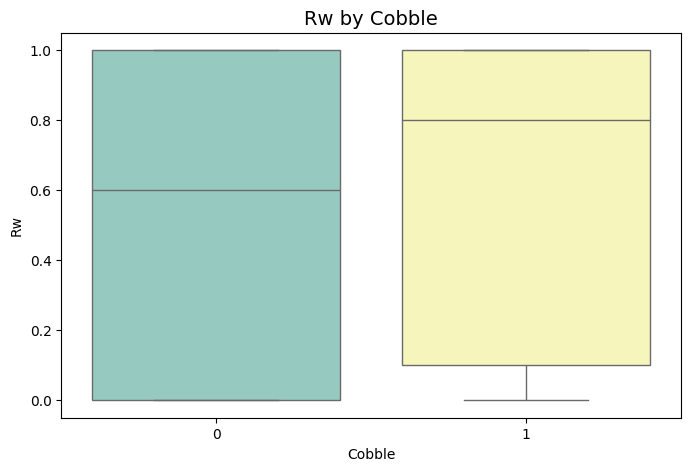

Generating Heatmaps for Categorical vs. Categorical variables...


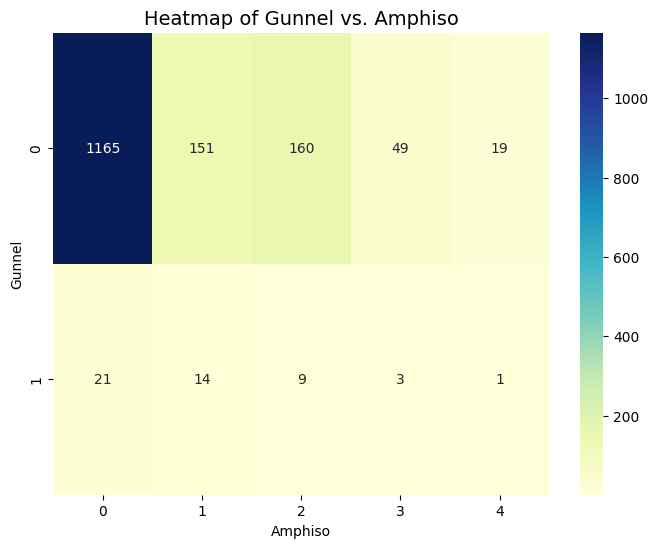

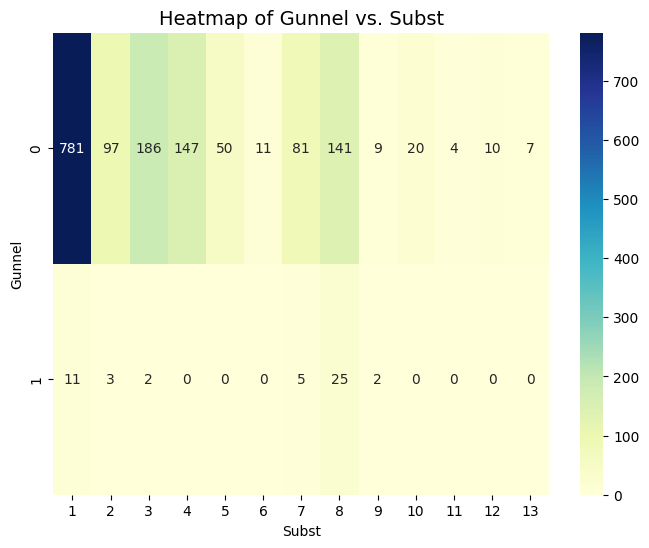

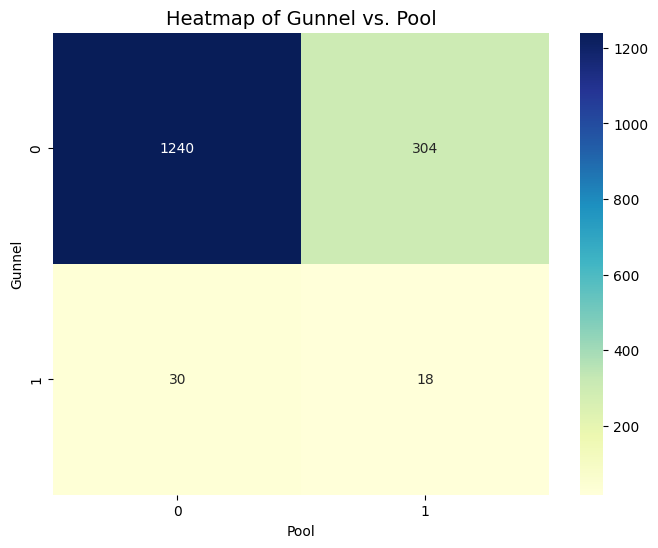

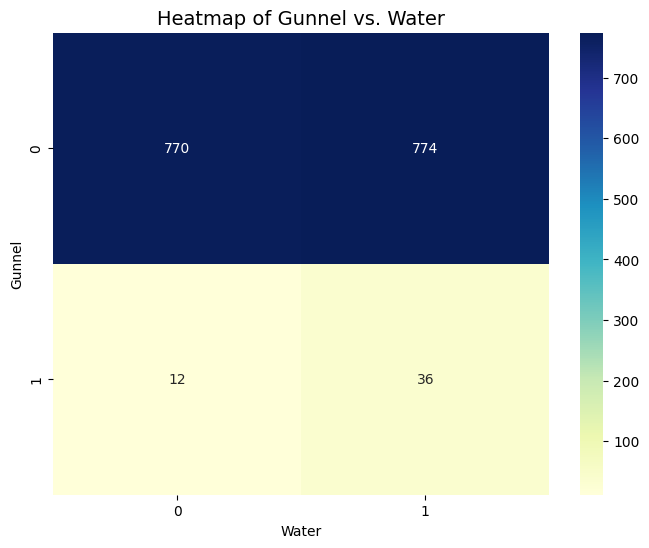

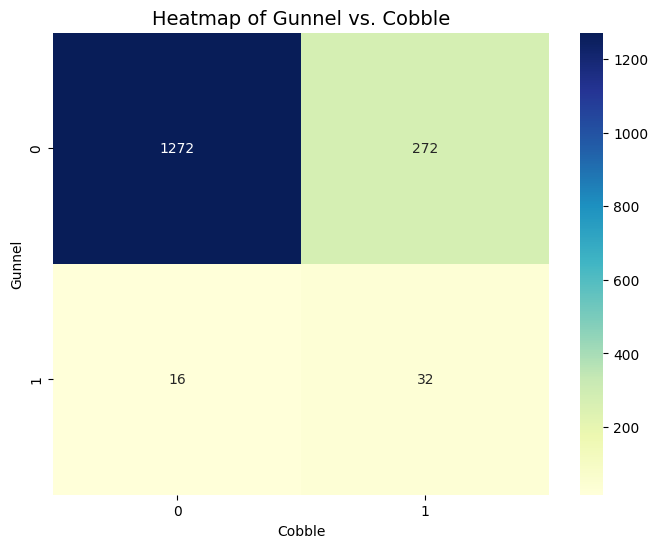

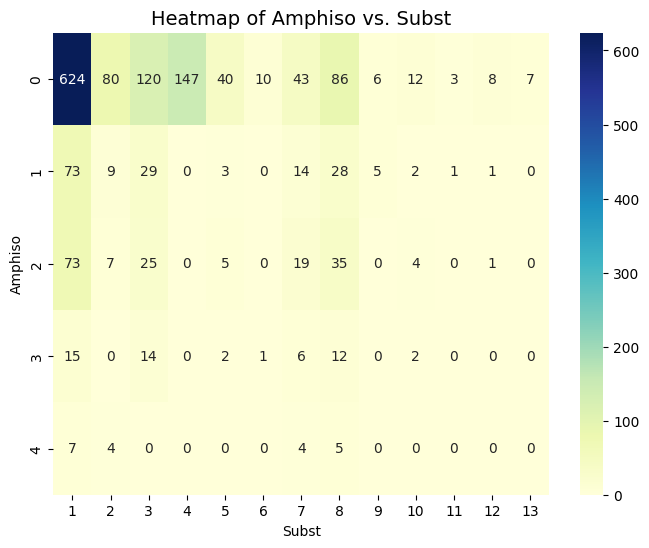

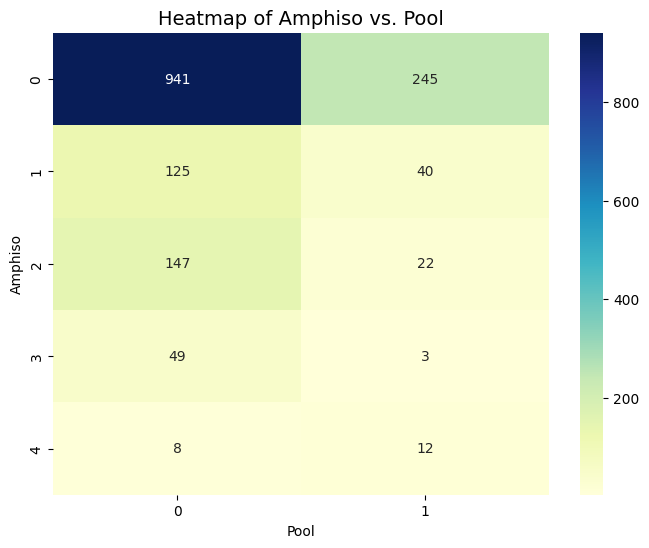

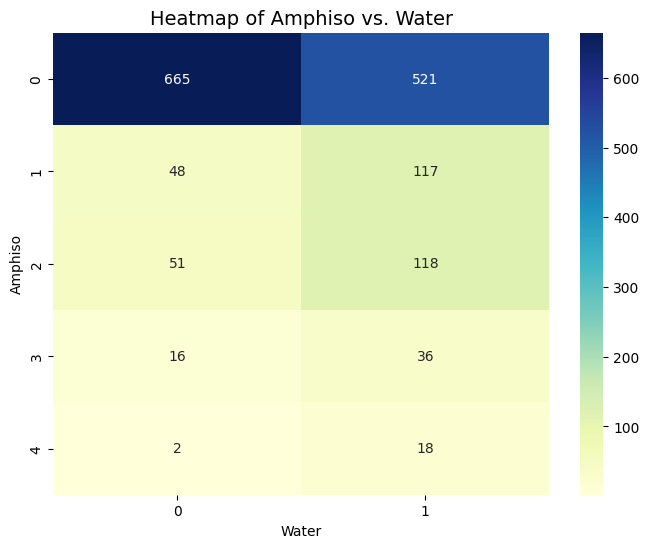

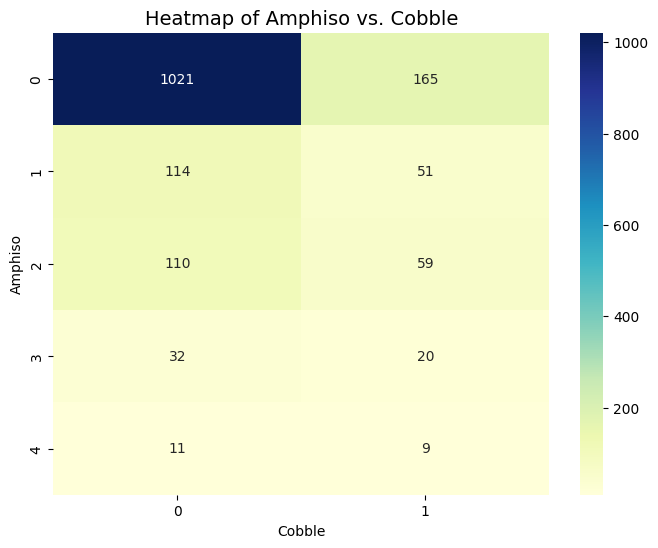

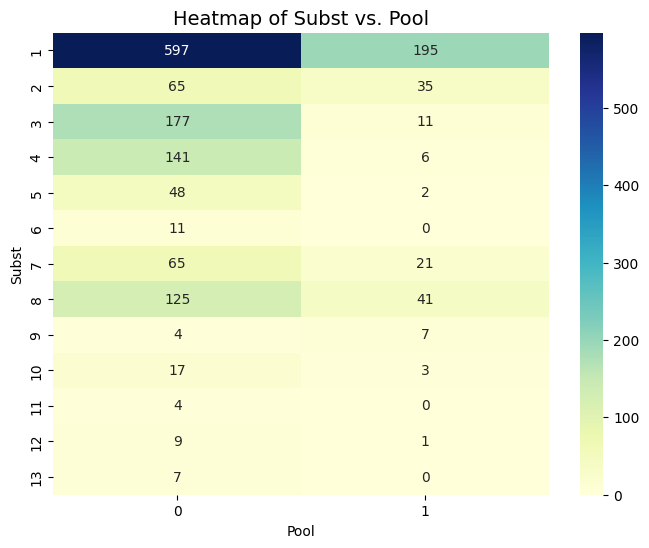

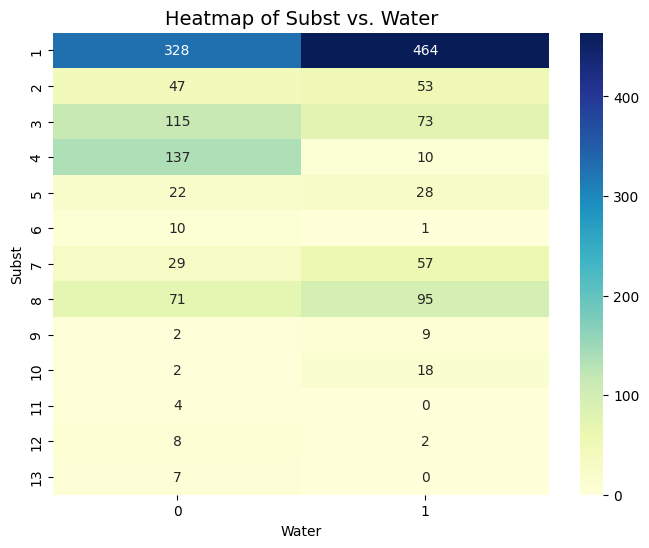

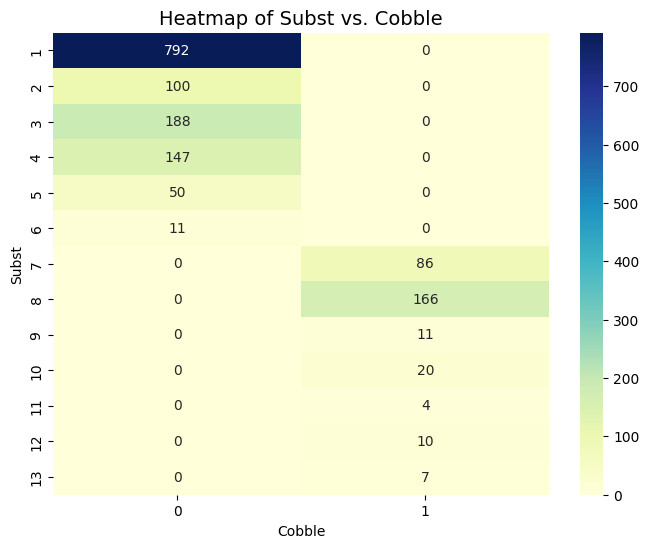

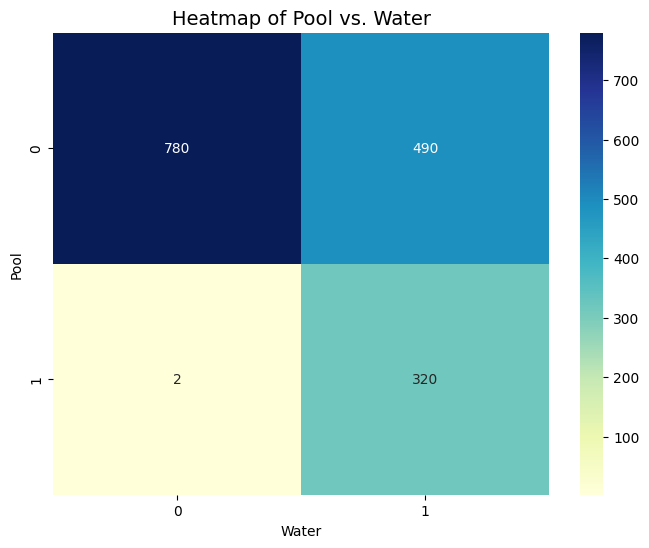

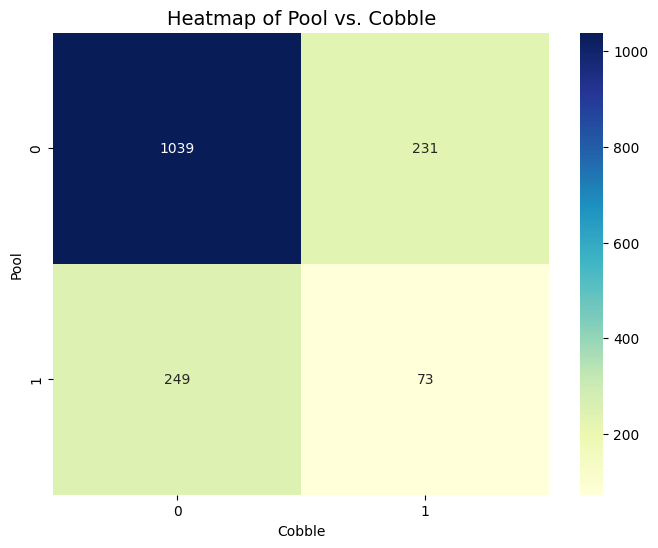

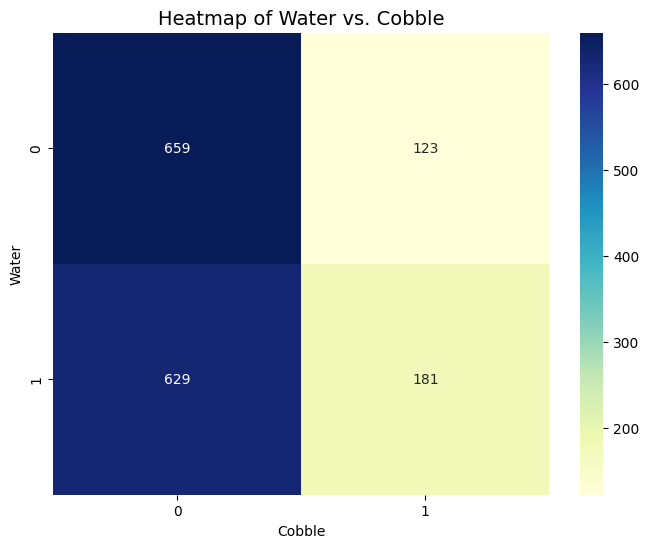

In [11]:
print("\nPerforming 2D Analysis...")

# Numerical vs. Numerical: Pairplot for a quick overview
print("Generating Pairplot for all continuous variables...")
sns.pairplot(df[continuous_cols])
plt.suptitle('Pairplot of Continuous Variables', y=1.02, size=16)
plt.show()

# Numerical vs. Categorical: Automated Boxplots
print("Generating Boxplots for Numerical vs. Categorical variables...")
for num_col in continuous_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set3')
        plt.title(f'{num_col} by {cat_col}', size=14)
        plt.show()

# Categorical vs. Categorical: Automated Heatmaps
print("Generating Heatmaps for Categorical vs. Categorical variables...")
from itertools import combinations

for col1, col2 in combinations(categorical_cols, 2):
    crosstab_res = pd.crosstab(df[col1], df[col2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_res, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Heatmap of {col1} vs. {col2}', size=14)
    plt.show()


#**(3.) 3D Analysis: Visualizing Three Variables Simultaneously**
To add another layer of depth, we can visualize three variables at once. Here, we plot the relationship between Slope and Fromlow while using the color of the points to represent a third variable, Water presence. This helps us understand if the relationship between the first two variables is influenced by the third.









Performing an illustrative 3D Analysis...


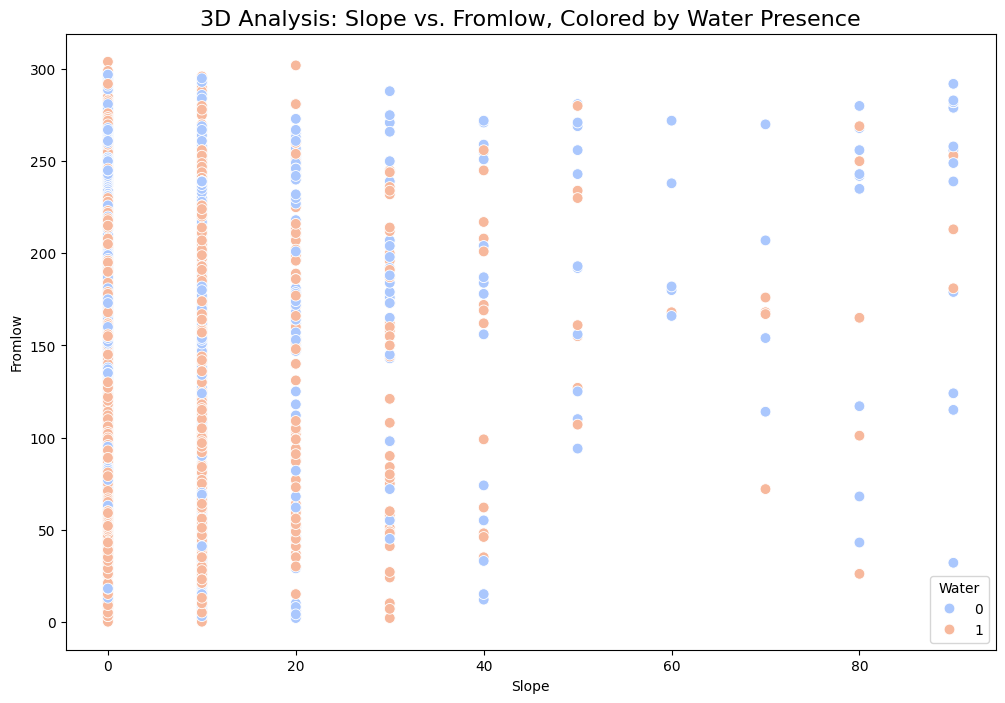

In [8]:
# --- 3D ANALYSIS ---
print("\nPerforming an illustrative 3D Analysis...")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Slope', y='Fromlow', hue='Water', data=df, palette='coolwarm', s=60)
plt.title('3D Analysis: Slope vs. Fromlow, Colored by Water Presence', size=16)
plt.show()



#***Section 3: Clustering***
----------------------------


##**Module 5: Unsupervised Learning - Clustering**
K-Means Clustering
Clustering is a machine learning technique used to group similar data points together. We use the K-Means algorithm to segment our data into distinct groups based on their continuous features.

The process involves:

Scaling the Data: Features are scaled to prevent variables with larger ranges from dominating the process.

The Elbow Method: We use this technique to find the optimal number of clusters (k) by identifying the point of diminishing returns.

Applying K-Means & Visualization: We run the algorithm with our chosen k and visualize the resulting clusters.






Performing K-Means Clustering...


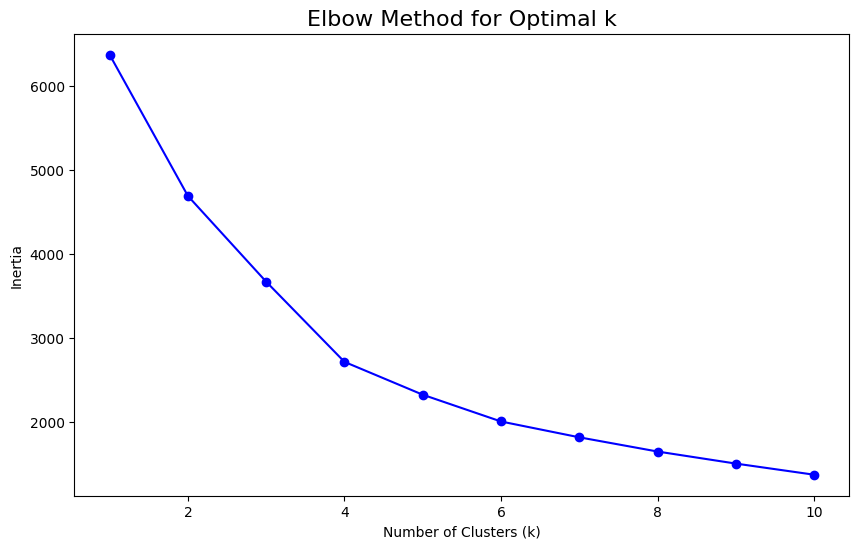

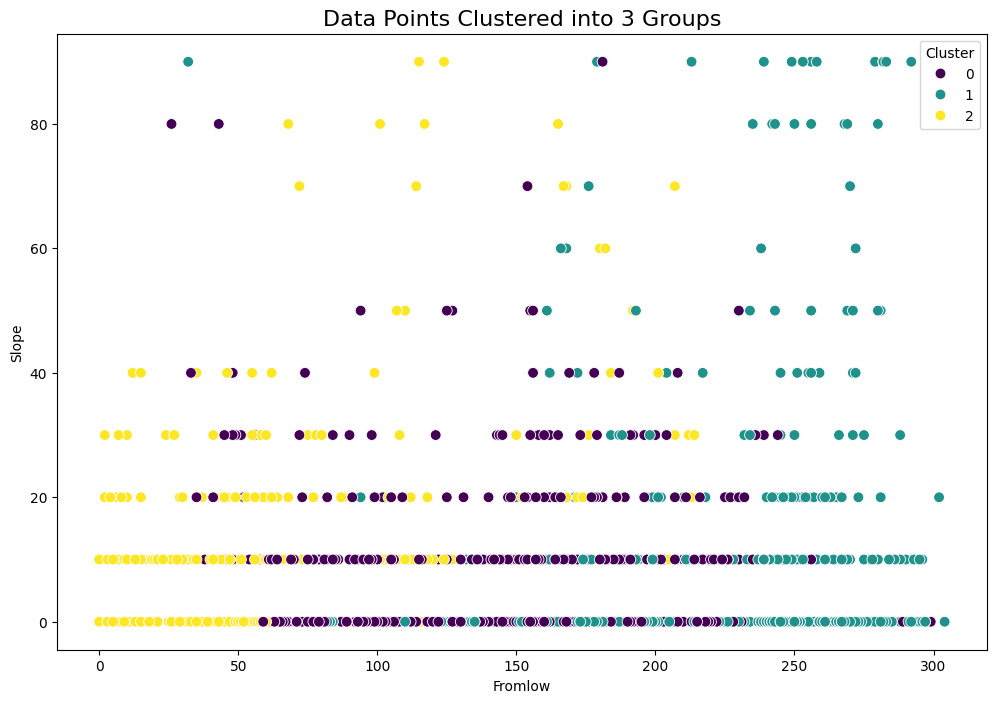


Clustering complete. 'Cluster' column has been added.


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("\nPerforming K-Means Clustering...")
features_for_clustering = ['Time', 'Fromlow', 'Slope', 'Rw']
X = df[features_for_clustering]

# Scale the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', size=16)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fromlow', y='Slope', hue='Cluster', data=df, palette='viridis', s=60)
plt.title(f'Data Points Clustered into {optimal_k} Groups', size=16)
plt.show()

print("\nClustering complete. 'Cluster' column has been added.")